/var/folders/yj/6cwm4qyj6qz3dkx7t8z3qxc40000gn/T/ipykernel_83284/2665121396.py:21: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(rpm, torque, degree)


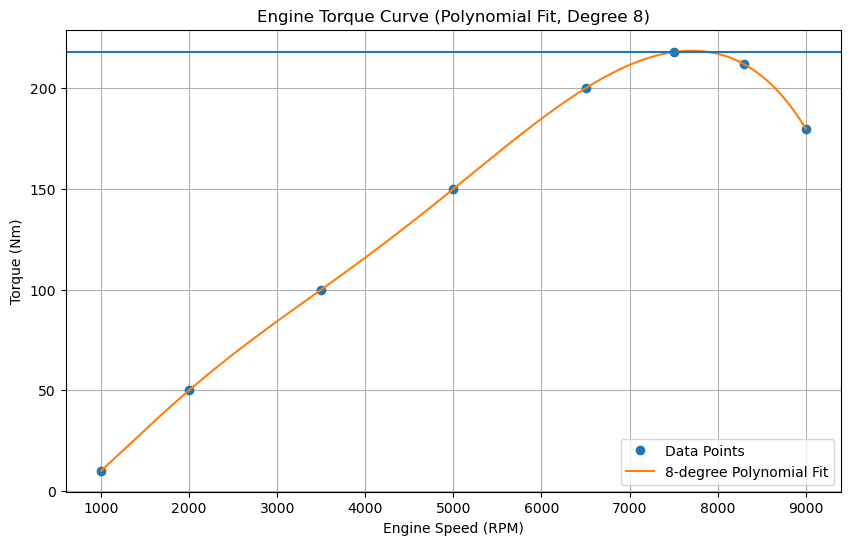

Coefficients of the fitted polynomial:
[-1.33585551e-28  3.71010297e-24 -2.97910497e-20 -8.41266493e-17
  2.55757428e-12 -1.44527790e-08  3.32837474e-05  7.00224025e-03
 -1.82804417e+01]
"coefficient_0": -18.280441719165758,
"coefficient_1": 0.007002240252081224,
"coefficient_2": 3.328374738240984e-05,
"coefficient_3": -1.4452779013228058e-08,
"coefficient_4": 2.5575742795284593e-12,
"coefficient_5": -8.412664932137809e-17,
"coefficient_6": -2.979104972749963e-20,
"coefficient_7": 3.710102973476813e-24,
"coefficient_8": -1.335855509367363e-28,


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
points = np.array([
    [1000, 10],
    [2000, 50],
    [3500, 100],
    [5000, 150],
    [6500, 200],
    [7500, 218],
    [8300, 212],
    [9000, 180]
])
maxTq = 218
rpm = points[:, 0]
torque = points[:, 1]

# Fit a 7th-degree polynomial to the data
degree = 8
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min(), rpm.max(), 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f'"coefficient_{i}": {coefficients[len(coefficients)-i-1]},')
